WORDNET EXPLORATION

In [2]:
import nltk
from nltk.corpus import wordnet as wn



In [35]:
# Cargar el Synset para "dog.n.01"
dog = wn.synset('entity.n.01')

# Información básica del Synset
print("Nombre del Synset:", dog.name())
print("Definición:", dog.definition())
print("Ejemplos de uso:", dog.examples())
print("Sinónimos:", dog.lemma_names())


Nombre del Synset: entity.n.01
Definición: that which is perceived or known or inferred to have its own distinct existence (living or nonliving)
Ejemplos de uso: []
Sinónimos: ['entity']


In [36]:
# Obtener los hypernyms de "dog.n.01"
hypernyms = dog.hypernyms()
print("Hypernyms (conceptos más generales):", [h.name() for h in hypernyms])
# Obtener los hyponyms de "dog.n.01"
hyponyms = dog.hyponyms()
print("Hyponyms (conceptos más específicos):", [h.name() for h in hyponyms])



Hypernyms (conceptos más generales): []
Hyponyms (conceptos más específicos): ['abstraction.n.06', 'physical_entity.n.01', 'thing.n.08']


In [37]:
# Synsets de "dog" y "cat"
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

# Obtener el ancestro común más cercano
lca = dog.lowest_common_hypernyms(cat)
print("Ancestro común más cercano:", lca[0].name(), "-", lca[0].definition())


Ancestro común más cercano: carnivore.n.01 - a terrestrial or aquatic flesh-eating mammal


In [38]:
# Obtener las rutas hacia la raíz para "dog.n.01" y "cat.n.01"
dog_paths = dog.hypernym_paths()
cat_paths = cat.hypernym_paths()

# Imprimir rutas
print("Ruta de 'dog.n.01':")
for synset in dog_paths[0]:
    print(f"  {synset.name()} - {synset.definition()}")

print("\nRuta de 'cat.n.01':")
for synset in cat_paths[0]:
    print(f"  {synset.name()} - {synset.definition()}")


Ruta de 'dog.n.01':
  entity.n.01 - that which is perceived or known or inferred to have its own distinct existence (living or nonliving)
  physical_entity.n.01 - an entity that has physical existence
  object.n.01 - a tangible and visible entity; an entity that can cast a shadow
  whole.n.02 - an assemblage of parts that is regarded as a single entity
  living_thing.n.01 - a living (or once living) entity
  organism.n.01 - a living thing that has (or can develop) the ability to act or function independently
  animal.n.01 - a living organism characterized by voluntary movement
  chordate.n.01 - any animal of the phylum Chordata having a notochord or spinal column
  vertebrate.n.01 - animals having a bony or cartilaginous skeleton with a segmented spinal column and a large brain enclosed in a skull or cranium
  mammal.n.01 - any warm-blooded vertebrate having the skin more or less covered with hair; young are born alive except for the small subclass of monotremes and nourished with milk

In [39]:
# Listar todos los Synsets de "dog"
dog_synsets = wn.synsets('dog')
for synset in dog_synsets:
    print(f"{synset.name()} - {synset.definition()}")


dog.n.01 - a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
frump.n.01 - a dull unattractive unpleasant girl or woman
dog.n.03 - informal term for a man
cad.n.01 - someone who is morally reprehensible
frank.n.02 - a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll
pawl.n.01 - a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward
andiron.n.01 - metal supports for logs in a fireplace
chase.v.01 - go after with the intent to catch


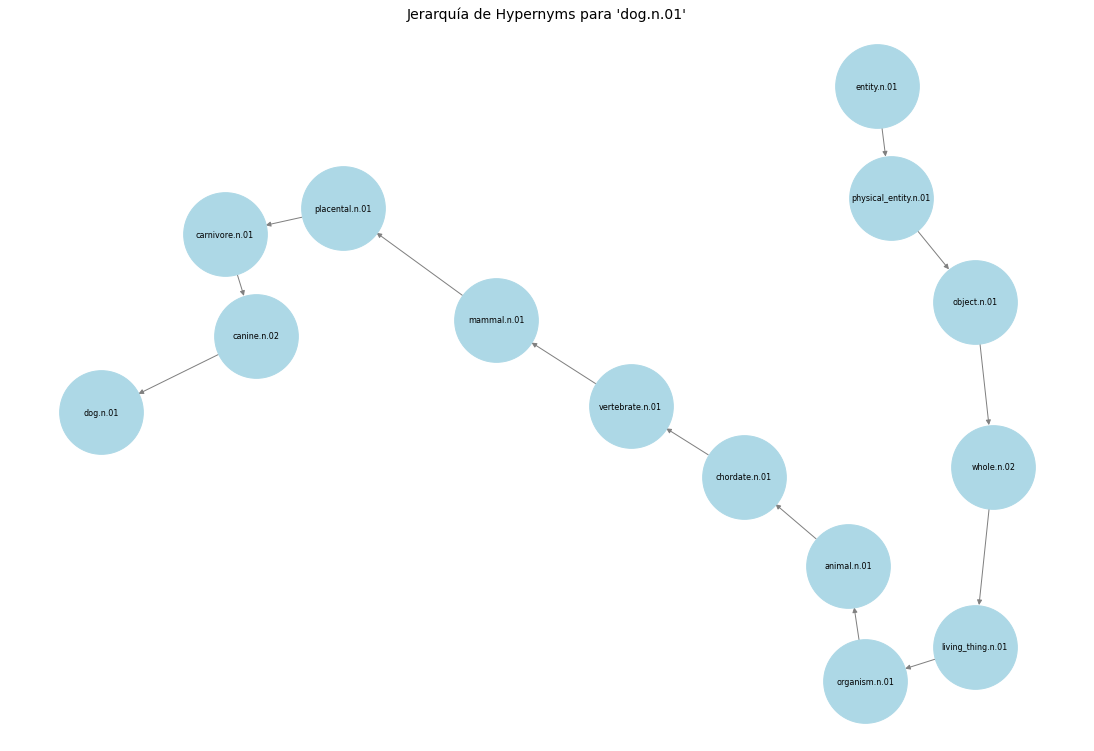

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo
G = nx.DiGraph()

# Añadir nodos y relaciones
for synset in dog.hypernym_paths()[0]:
    G.add_node(synset.name(), label=synset.name())
    if synset.hypernyms():
        G.add_edge(synset.hypernyms()[0].name(), synset.name())

# Configuración del gráfico
plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
pos = nx.spring_layout(G, seed=42)  # Distribución más clara
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=7000,
    node_color="lightblue",
    edge_color="gray",
    font_size=10,
)
# Añadir etiquetas con definiciones más visibles
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, verticalalignment='center')

plt.title("Jerarquía de Hypernyms para 'dog.n.01'", fontsize=14)
plt.show()



In [56]:
from nltk.corpus import wordnet as wn

# Lista de etiquetas (10 palabras)
image_labels = ['golden_retriever', 'beagle', 'labrador_retriever', 'wolf', 
                'fox', 'cat', 'lion', 'tiger', 'cheetah', 'dog']

# Convertir etiquetas a Synsets (primer Synset de cada palabra)
synsets = [wn.synsets(label, pos=wn.NOUN)[0] for label in image_labels]

# Mostrar los Synsets y sus definiciones
for synset in synsets:
    print(f"Etiqueta: {synset.name()} - {synset.definition()}")


Etiqueta: golden_retriever.n.01 - an English breed having a long silky golden coat
Etiqueta: beagle.n.01 - a small short-legged smooth-coated breed of hound
Etiqueta: labrador_retriever.n.01 - breed originally from Labrador having a short black or golden-brown coat
Etiqueta: wolf.n.01 - any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs
Etiqueta: fox.n.01 - alert carnivorous mammal with pointed muzzle and ears and a bushy tail; most are predators that do not hunt in packs
Etiqueta: cat.n.01 - feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
Etiqueta: lion.n.01 - large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male
Etiqueta: tiger.n.01 - a fierce or audacious person
Etiqueta: cheetah.n.01 - long-legged spotted cat of Africa and southwestern Asia having nonretractile claws; the swiftest mammal; can be trained to run down game
Etiqueta: do

In [57]:
# Encontrar el ancestro común más cercano
common_ancestor = synsets[0]  # Empezamos con el primer Synset
for synset in synsets[1:]:    # Iteramos sobre los demás
    common_ancestor = common_ancestor.lowest_common_hypernyms(synset)[0]

# Mostrar el resultado
print("Ancestro común más cercano:")
print(f"  {common_ancestor.name()} - {common_ancestor.definition()}")


Ancestro común más cercano:
  organism.n.01 - a living thing that has (or can develop) the ability to act or function independently


In [58]:
# Ruta hacia la raíz
hypernym_path = common_ancestor.hypernym_paths()[0]

print("Ruta hacia la raíz:")
for hypernym in hypernym_path:
    print(f"  {hypernym.name()} - {hypernym.definition()}")


Ruta hacia la raíz:
  entity.n.01 - that which is perceived or known or inferred to have its own distinct existence (living or nonliving)
  physical_entity.n.01 - an entity that has physical existence
  object.n.01 - a tangible and visible entity; an entity that can cast a shadow
  whole.n.02 - an assemblage of parts that is regarded as a single entity
  living_thing.n.01 - a living (or once living) entity
  organism.n.01 - a living thing that has (or can develop) the ability to act or function independently


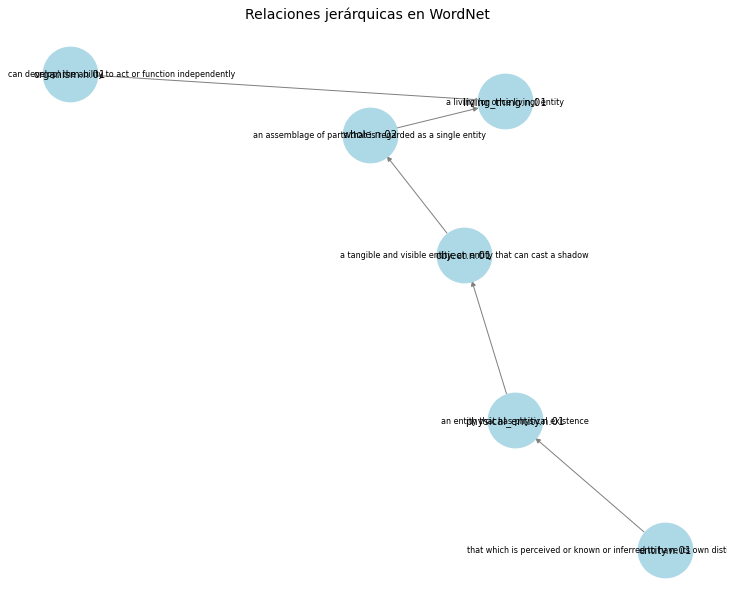

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo
G = nx.DiGraph()

# Añadir nodos y relaciones
for synset in hypernym_path:
    G.add_node(synset.name(), label=synset.definition())
    if synset.hypernyms():
        G.add_edge(synset.hypernyms()[0].name(), synset.name())

# Configurar el gráfico
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, verticalalignment='center')

plt.title("Relaciones jerárquicas en WordNet", fontsize=14)
plt.show()


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Definiciones de los Synsets
definitions = [synset.definition() for synset in synsets]

# Calcular vectores TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(definitions)

# Calcular similitud coseno entre las definiciones
similarity_matrix = cosine_similarity(tfidf_matrix)
print("Matriz de similitud:")
print(similarity_matrix)


Matriz de similitud:
[[1.         0.09032877 0.31070855 0.         0.         0.04116789
  0.1054667  0.         0.10414647 0.        ]
 [0.09032877 1.         0.17519629 0.07654285 0.         0.
  0.03958876 0.         0.10041574 0.02964475]
 [0.31070855 0.17519629 1.         0.         0.         0.03461853
  0.08868811 0.12962067 0.02872    0.05298597]
 [0.         0.07654285 0.         1.         0.25748113 0.08343271
  0.17162625 0.         0.06809628 0.09825884]
 [0.         0.         0.         0.25748113 1.         0.08697805
  0.1285766  0.         0.07215818 0.05112363]
 [0.04116789 0.         0.03461853 0.08343271 0.08697805 1.
  0.11460694 0.         0.13225882 0.        ]
 [0.1054667  0.03958876 0.08868811 0.17162625 0.1285766  0.11460694
  1.         0.         0.15539098 0.11366035]
 [0.         0.         0.12962067 0.         0.         0.
  0.         1.         0.         0.        ]
 [0.10414647 0.10041574 0.02872    0.06809628 0.07215818 0.13225882
  0.15539098 0.

In [62]:
# Generar resumen simple
def generate_summary(synsets):
    definitions = [synset.definition() for synset in synsets]
    summary = " Esta neurona responde a conceptos como: " + ", ".join(definitions)
    return summary

# Ejemplo
summary = generate_summary(synsets)
print(summary)


 Esta neurona responde a conceptos como: an English breed having a long silky golden coat, a small short-legged smooth-coated breed of hound, breed originally from Labrador having a short black or golden-brown coat, any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs, alert carnivorous mammal with pointed muzzle and ears and a bushy tail; most are predators that do not hunt in packs, feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats, large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male, a fierce or audacious person, long-legged spotted cat of Africa and southwestern Asia having nonretractile claws; the swiftest mammal; can be trained to run down game, a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds


In [67]:
from transformers import pipeline

# Modelo de resumen
summarizer = pipeline("summarization")

# Resumir definiciones
full_text = ". ".join([synset.definition() for synset in synsets])
summary = summarizer(full_text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])


ModuleNotFoundError: No module named 'transformers'

In [65]:
from sentence_transformers import SentenceTransformer, util

# Cargar modelo de embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Definiciones y descriptores de imágenes
definitions = [synset.definition() for synset in synsets]
image_descriptors = ["This image contains a dog", "This image shows a wolf"]

# Calcular embeddings
def_embeddings = model.encode(definitions)
img_embeddings = model.encode(image_descriptors)

# Similitud coseno
similarities = util.cos_sim(def_embeddings, img_embeddings)
print("Matriz de similitud:")
print(similarities)


ModuleNotFoundError: No module named 'sentence_transformers'

In [66]:
from sklearn.cluster import KMeans

# Calcular embeddings de definiciones (usando TF-IDF o embeddings)
tfidf_matrix = vectorizer.fit_transform(definitions)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tfidf_matrix)

# Mostrar clústeres
clusters = kmeans.labels_
for i, definition in enumerate(definitions):
    print(f"Definición: {definition} - Clúster: {clusters[i]}")


Definición: an English breed having a long silky golden coat - Clúster: 1
Definición: a small short-legged smooth-coated breed of hound - Clúster: 1
Definición: breed originally from Labrador having a short black or golden-brown coat - Clúster: 1
Definición: any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs - Clúster: 0
Definición: alert carnivorous mammal with pointed muzzle and ears and a bushy tail; most are predators that do not hunt in packs - Clúster: 0
Definición: feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats - Clúster: 0
Definición: large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male - Clúster: 0
Definición: a fierce or audacious person - Clúster: 1
Definición: long-legged spotted cat of Africa and southwestern Asia having nonretractile claws; the swiftest mammal; can be trained to run down game - Clúster: 0
Definición: a m